In [104]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Đọc file

In [105]:
df = pd.read_csv('archive/DataScientist.csv',index_col='index')
df.head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
index,,,,,,,,,,,,,,,,
0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3909 entries, 0 to 4379
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3909 non-null   int64  
 1   Job Title          3909 non-null   object 
 2   Salary Estimate    3909 non-null   object 
 3   Job Description    3909 non-null   object 
 4   Rating             3909 non-null   float64
 5   Company Name       3909 non-null   object 
 6   Location           3909 non-null   object 
 7   Headquarters       3909 non-null   object 
 8   Size               3909 non-null   object 
 9   Founded            3909 non-null   int64  
 10  Type of ownership  3909 non-null   object 
 11  Industry           3909 non-null   object 
 12  Sector             3909 non-null   object 
 13  Revenue            3909 non-null   object 
 14  Competitors        3909 non-null   object 
 15  Easy Apply         3909 non-null   object 
dtypes: float64(1), int64(2),

# Xử lí dữ liệu

#  Cleaning

Thay thế các giá trị -1 bằng NaN

In [107]:
df.replace(['-1'], [np.nan], inplace=True)
df.replace(['-1.0'], [np.nan], inplace=True)
df.replace([-1], [np.nan], inplace=True)

Kiểm tra xem còn giá trị khác không?

In [108]:
df.isnull().sum()

Unnamed: 0              0
Job Title               0
Salary Estimate         0
Job Description         0
Rating                409
Company Name            0
Location                0
Headquarters          240
Size                  229
Founded               977
Type of ownership     229
Industry              546
Sector                546
Revenue               229
Competitors          2760
Easy Apply           3745
dtype: int64

# Tách cột Salary Estimate thành 2 cột mới: minimum salary và maximum salary

In [109]:
df_salary = df['Salary Estimate'].str.split("-",expand=True,)

minimum_salary = df_salary[0]
minimum_salary = minimum_salary.str.replace('K',' ')


maximum_salary = df_salary[1].str.replace('(Glassdoor est.)', ' ')
maximum_salary = maximum_salary.str.replace('(', ' ')
maximum_salary = maximum_salary.str.replace(')', ' ')
maximum_salary = maximum_salary.str.replace('K', ' ')
maximum_salary = maximum_salary.str.replace('Employer est.', ' ')
maximum_salary = maximum_salary.str.replace('Per Hour', ' ')

maximum_salary = maximum_salary.str.replace('$', ' ').fillna(0).astype(int)
minimum_salary = minimum_salary.str.replace('$', ' ').fillna(0).astype(int)

df['Minimum Salary'] = minimum_salary
df['Maximum Salary'] = maximum_salary

df.drop('Salary Estimate',axis = 1,inplace = True)

# Ta cũng tách cột Revenue thành 2 cột mới: Maximum Revenue và Minimum Revenue

Đầu tiên tiến hành định dạng lại dữ liệu để có thể xử lí

In [110]:
# Thay thế các giá trị unknow thành none
df['Revenue'] = df['Revenue'].replace('Unknown / Non-Applicable', None)

In [111]:
df['Revenue'] = df['Revenue'].str.replace('$', ' ')
df['Revenue'] = df['Revenue'].str.replace('(USD)', ' ')
df['Revenue'] = df['Revenue'].str.replace('(', ' ')
df['Revenue'] = df['Revenue'].str.replace(')', ' ')
df['Revenue'] = df['Revenue'].str.replace(' ', '')

In [112]:
df['Revenue'] = df['Revenue'].str.replace('2to5billion', '2billionto5billion')
df['Revenue'] = df['Revenue'].str.replace('5to10billion ', '5billionto10billion ')
df['Revenue'] = df['Revenue'].replace('million', ' ')
df['Revenue'] = df['Revenue'].replace('10+billion', '10billionto11billion')
df['Revenue'] = df['Revenue'].str.replace('Lessthan1million', '0millionto1million')

In [113]:
df['Revenue'] = df['Revenue'].str.replace('million', ' ')
df['Revenue'] = df['Revenue'].str.replace('billion', '000 ')

Tiến hành chia dữ liệu thành 2 cột

In [114]:
Revenue = df['Revenue'].str.split("to",expand=True)
df['Minimum Revenue'] = Revenue[0]
df['Maximum Revenue'] = Revenue[1]

# Đưa dữ liệu về định dạng int64
df['Maximum Revenue'] = pd.to_numeric(df['Maximum Revenue'])
df['Minimum Revenue'] = pd.to_numeric(df['Minimum Revenue'])

#Xóa cột Revenue cũ 
df.drop('Revenue',1,inplace=True)


In [115]:
# Xóa phần dữ liệu thừa phía sau tên công ty
df['Company Name'] = df['Company Name'].str.replace('\n.*', ' ')

# Tách cột size thành cột Minimum Size và Maximum Size

In [116]:
df['Size'].value_counts()

10000+ employees           993
51 to 200 employees        563
1001 to 5000 employees     553
1 to 50 employees          550
201 to 500 employees       418
501 to 1000 employees      307
5001 to 10000 employees    219
Unknown                     77
Name: Size, dtype: int64

In [117]:
# Xóa employees
df['Size'] = df['Size'].str.replace('employees', '')

In [118]:
df['Size'] = df['Size'].str.replace('+', 'plus')
df['Size'] = df['Size'].replace('Unknown', None)

df['Size'] = df['Size'].str.replace('10000plus', '10000 to 10001')


In [119]:
size = df['Size'].str.split("to",expand=True)
df['Minimum Size'] = size[0]
df['Maximum Size'] = size[1]
df.drop('Size',1,inplace = True)

df['Minimum Size'] = pd.to_numeric(df['Minimum Size'])
df['Maximum Size'] = pd.to_numeric(df['Maximum Size'])


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3909 entries, 0 to 4379
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3909 non-null   int64  
 1   Job Title          3909 non-null   object 
 2   Job Description    3909 non-null   object 
 3   Rating             3500 non-null   float64
 4   Company Name       3909 non-null   object 
 5   Location           3909 non-null   object 
 6   Headquarters       3669 non-null   object 
 7   Founded            2932 non-null   float64
 8   Type of ownership  3680 non-null   object 
 9   Industry           3363 non-null   object 
 10  Sector             3363 non-null   object 
 11  Competitors        1149 non-null   object 
 12  Easy Apply         164 non-null    object 
 13  Minimum Salary     3909 non-null   int32  
 14  Maximum Salary     3909 non-null   int32  
 15  Minimum Revenue    2517 non-null   float64
 16  Maximum Revenue    2517 

# 1. Đánh giá các công ty lớn

Tiêu chí đánh giá: rating, Revenue, Size, Salary Estimate

+ Rating >= 3

+ Minimum size > 10000

+ Minimum Revenue > 10000

+ Salary min > 100

=> Biết được các công ty có quy mô lớn và đang phát triển mạnh. Qua đó tìm kiếm cơ hội làm ăn và phát triển các mối quan hệ đối với các công ty này.

Ở đây không sử dụng cột founded (tức năm thành lập) vì nhiều công ty dù được thành lập muộn hơn nhưng biết nắm bắt thời cơ và có phương hướng phát triển tốt nên đã trở thành các công ty mạnh mẽ.

# 2. Xu hướng tuyển dụng của các công ty lớn hiện nay như thế nào?
Tiêu chí đánh giá công ty lớn: rating, Revenue, Size, Salary (ta đã thực hiện ở trên rồi)

Các vị trí được các công ty này tuyển dụng nhiều nhất.

Lợi ích: 	
+ đối với doanh nghiệp -> nhanh chóng nắm bắt được xu hướng kinh doanh và phát triển của công ty khác
+ đối với các nhà môi giới tuyển dụng -> dễ dàng nắm bắt và nhanh chóng tìm kiếm nguồn nhân sự cho các công ty
+ đối với người tìm việc -> kịp thời nắm bắt xu hướng việc làm để phát triển bản thân và tìm kiếm công việc phù hợp


# Đầu tiên ta cần lọc lại Job Title

Vì đây là nền tảng do các doanh nghiệp tự đăng bài tìm người nên job title được để không theo một định dạng cố định nên khi
xử lí dữ liệu sẽ cho ra rất nhiều nghề khác nhau. Để xử lí vấn đề đó nhóm em quyết định sử dụng những từ khóa tìm được lọc 
lại để hạn chế tối đa việc dữ liệu bị nhiễu 

In [121]:

df_job_title = df['Job Title'].str.lower()

print(len(df_job_title.value_counts()))

need_replace_1 = [r'.*data analyst.*',r'.*analytics.*',r'.*compliance engineer.*',r'.*modeling engineer.*',r'.*postdoctoral.*',
                r'.*analyst.*', r'.*quality.*', r'.*analytical.*']
need_replace_2 = [r'.*data science.*',r'.*senior scientist.*',r'.*scientist I.*',r'.*engineering.*',r'.*bi scientist.*',
                r'.*innovation.*', r'.*physical scientist.*', r'.*development.*',r'.*bioanalytics.*', r'.*r&d scientist.*',
                r'.*scientist process chemist.*', r'.*rd scientist.*', r'.*data operations.*', r'.*data architect.*',
                r'.*combustion.*', r'.*scientist ii.*', r'.*scientist iv.*', r'.*Scientist iii.*',r'.*data scientist.*',
                 r'.*senior data.*',r'.*senior scientist.*']
need_replace_3 = [r'.*quantitative.*',r'.*research.*',r'.*radar.*']
need_replace_4 = [r'.*ai scientist.*',r'.*learning.*',r'.*robotics scientist.*',r'.*intelligence.*',r'.*informatics scientist.*']

df_job_title = df_job_title.replace(to_replace = r'.*process.*', value = 'Process Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*Ergonomics.*', value = 'Ergonomics Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = [r'.*assistant.*',r'.*experiment support.*'], value = 'Assistant Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*imaging.*', value = 'Imaging Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = [r'.*biopharm.*',r'.*bioinformatics.*'], value = 'Bioinformatics Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*translational.*', value = 'Translational Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*behavioral.*', value = 'Behavioral Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*secure.*', value = 'Secure Data Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*pharmacovgilance.*', value = 'Pharmacovgilance Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*decision.*', value = 'Decision Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*staff.*', value = 'Staff Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*principle.*', value = 'Principle Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*human.*', value = 'Human Factors Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*food.*', value = 'Food Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*technology.*', value = 'Technology Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*project.*', value = 'Project Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*computer.*', value = 'Computer Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*software.*', value = 'Software Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*applications.*', value = 'Applications Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = [r'.*laboratory scientist.*',r'.*lab.*'], value = 'Laboratory Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*data modeler.*', value = 'Data Modeler', regex=True)
df_job_title = df_job_title.replace(to_replace = [r'.*environmental scientist.*',r'.*environmental.*'], value = 'Environmental Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*associate scientist.*', value = 'Associate Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*applied scientist.*', value = 'Applied Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = [r'.*data consultant.*',r'.*consultant.*'], value = 'Data Consultant', regex=True)
df_job_title = df_job_title.replace(to_replace = [r'.*data engineer.*',r'.*engineering.*'], value = 'Data Engineer', regex=True)
df_job_title = df_job_title.replace(to_replace = need_replace_4, value = 'AI Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = need_replace_3, value = 'Quantitative Researcher', regex=True)
df_job_title = df_job_title.replace(to_replace = need_replace_1, value = 'Data Analyst', regex=True)
df_job_title = df_job_title.replace(to_replace = need_replace_2, value = 'Data Science', regex=True)

df['Job Title'] = df_job_title


2054


In [122]:
df_big_company = df[(df['Rating'] >= 3.0) & (df['Minimum Revenue'] >= 10000.0) & (df['Minimum Revenue'] == 10000.0) & (df['Minimum Salary'] >=100)]
df_big_company

,Unnamed: 0,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Founded,Type of ownership,Industry,Sector,Competitors,Easy Apply,Minimum Salary,Maximum Salary,Minimum Revenue,Maximum Revenue,Minimum Size,Maximum Size
index,,,,,,,,,,,,,,,,,,,
20,20,Data Science,Job Summary:Comprised of Disney's internationa...,4.0,Walt Disney Co.,"New York, NY","Burbank, CA",1923.0,Company - Public,Motion Picture Production & Distribution,Media,"News Corp, WarnerMedia, NBCUniversal",NaN,111,181,10000.0,11000.0,10000.0,10001.0
27,27,Data Science,Description: Its a new day in health care.\n\n...,3.3,Aetna,"New York, NY","Hartford, CT",1853.0,Company - Public,Insurance Carriers,Insurance,NaN,NaN,111,181,10000.0,11000.0,10000.0,10001.0
29,29,Data Science,Description: Its a new day in health care.\n\n...,3.3,Aetna,"New York, NY","Hartford, CT",1853.0,Company - Public,Insurance Carriers,Insurance,NaN,NaN,111,181,10000.0,11000.0,10000.0,10001.0
53,51,Data Science,*CIB Applied AI & Machine Learning - Digital &...,3.9,JPMorgan Chase,"New York, NY","New York, NY",1799.0,Company - Public,Investment Banking & Asset Management,Finance,NaN,NaN,120,140,10000.0,11000.0,10000.0,10001.0
56,54,Data Science,Description: Its a new day in health care.\n\n...,3.3,Aetna,"New York, NY","Hartford, CT",1853.0,Company - Public,Insurance Carriers,Insurance,NaN,NaN,120,140,10000.0,11000.0,10000.0,10001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4181,3711,Quantitative Researcher,Job Description\n\nImportant Note: During the ...,3.6,Wells Fargo,"Irving, TX","San Francisco, CA",1852.0,Company - Public,Banks & Credit Unions,Finance,NaN,NaN,100,172,10000.0,11000.0,10000.0,10001.0
4221,3751,Data Analyst,Abbott is a global healthcare leader that help...,3.6,Abbott Laboratories,"Columbus, OH","Abbott Park, IL",1888.0,Company - Public,Health Care Services & Hospitals,Health Care,NaN,NaN,100,163,10000.0,11000.0,10000.0,10001.0
4222,3752,Data Science,The Chase Sales Science team supports the exec...,3.9,JPMorgan Chase & Co.,"Columbus, OH","New York, NY",1799.0,Company - Public,Investment Banking & Asset Management,Finance,NaN,NaN,100,163,10000.0,11000.0,10000.0,10001.0


=> Có thể thấy data ban đầu gồm 3909 dòng tương đương 3909 công ty tuy nhiên sau khi lọc và giữ lại các công ty lớn chỉ còn 214 công ty. Tỉ lệ xấp xỉ 1/20. Qua đó có thể thấy số lượng công ty lớn trên thị trường là không nhiều mà mỗi công ty lại kinh doanh về một lĩnh vực khác nhau nên việc có thể xin được việc ở các công ty lớn sẽ là không hề dễ dàng.


Biểu đồ thể hiện top 20 nghề được tuyển dụng nhiều nhất 

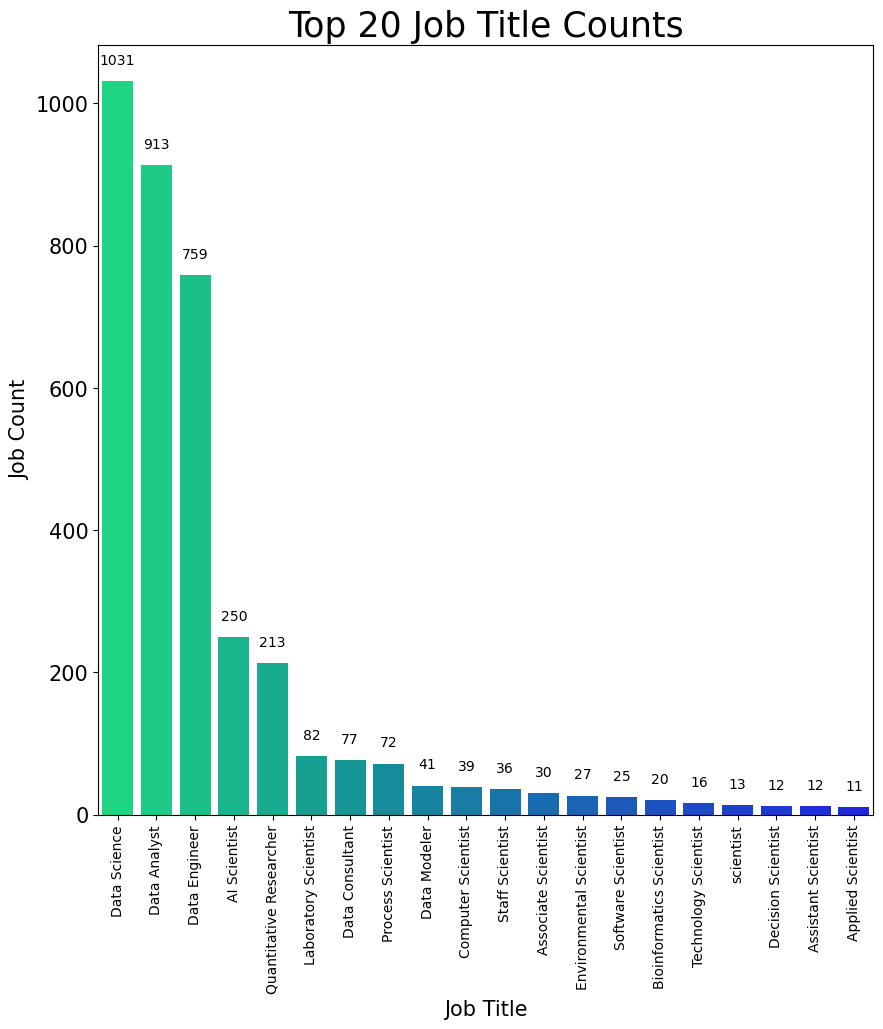

In [123]:
plt.subplots(figsize=(10,10))
splot = sns.barplot(x=df_job_title.value_counts()[0:20].index,y=df_job_title.value_counts()[0:20], palette = 'winter_r')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 15), textcoords = 'offset points')

plt.xlabel('Job Title',fontsize=15)
plt.ylabel('Job Count',fontsize=15)
plt.xticks(rotation=90)
plt.yticks(fontsize=15)
plt.title('Top 20 Job Title Counts',fontsize=25);

=> Có thể thấy 3 nghề được tuyển dụng nhiều nhất lần lượt là Data Science, Data Analyst, Data engineer

Tiếp theo ta thực hiện thống kê các nghề được các công ty lớn tuyển dụng nhiều nhất

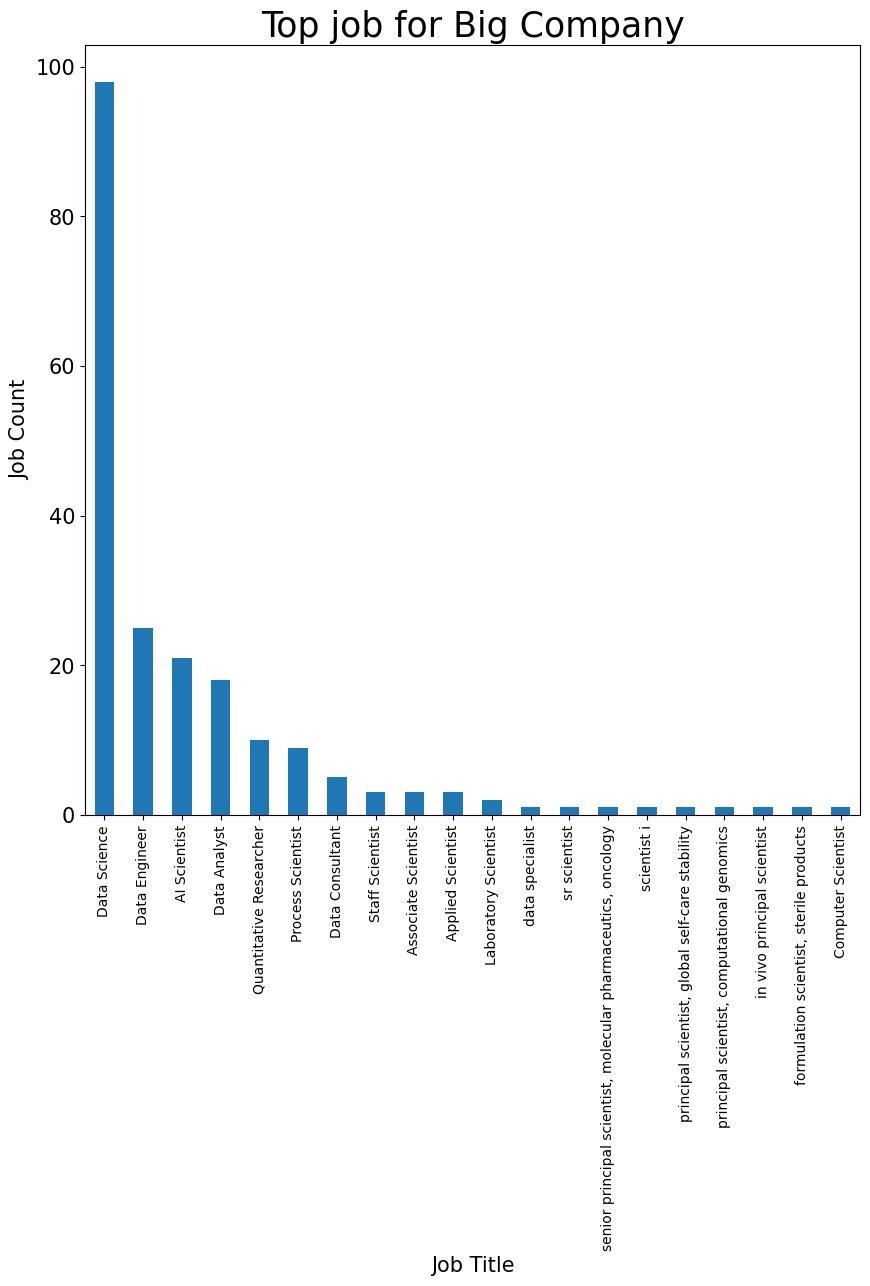

In [149]:
df_big_company_job = df_big_company.groupby('Job Title')['Company Name'].count()
df_big_company_job = df_big_company_job.sort_values(ascending=False)
plt.subplots(figsize=(10,10))
df_big_company_job[0:20].plot.bar()

plt.xlabel('Job Title',fontsize=15)
plt.ylabel('Job Count',fontsize=15)
plt.xticks(rotation=90)
plt.yticks(fontsize=15)
plt.title('Top job for Big Company',fontsize=25);